# Embedding Data


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

[6.6262558  3.03732012 6.9133364 ]


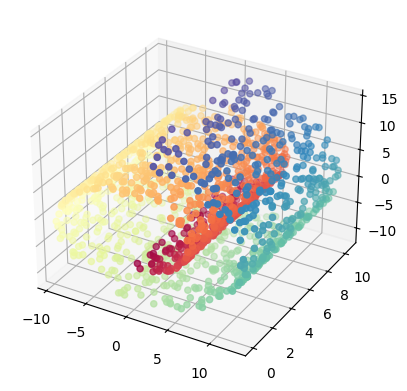

In [20]:
swiss, color = datasets.make_swiss_roll(1600)
swiss[:,1] = swiss[:,1]/2
print(np.std(swiss, axis=0))#, np.std(swiss, axis=1), np.std(swiss, axis=2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss[:, 0], swiss[:,1], swiss[:,2], c=color, cmap=plt.cm.Spectral)

# PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
compressed = pca.fit_transform(swiss)

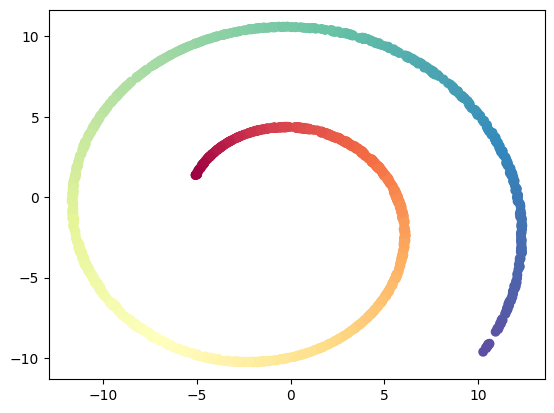

In [22]:
plt.scatter(compressed[:,0], compressed[:,1], c=color, cmap = plt.cm.Spectral)

# Self - Organising Maps

In [23]:
from minisom import MiniSom
#https://github.com/JustGlowing/minisom/blob/master/minisom.py
som = MiniSom(20,25, 3, sigma=0.5, learning_rate=0.5) # initialization of 20 x 25 SOM
som.random_weights_init(swiss)
som.train_random(swiss, 10000)

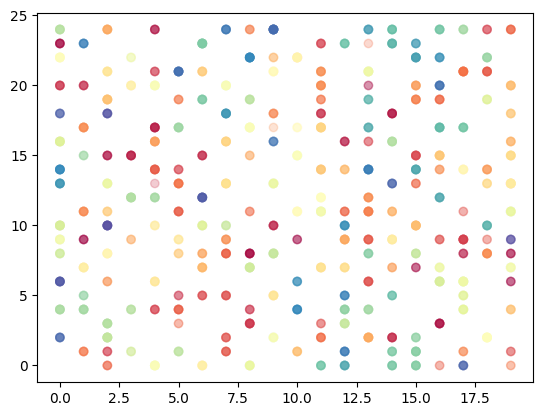

In [24]:
for i, x in enumerate(swiss):
    w = som.winner(x)  # getting the winner
    if i==0:
        res = w
    else:
        res = np.vstack([res, w])
plt.scatter(res[:,0], res[:,1], c=color, cmap=plt.cm.Spectral, alpha=0.25)

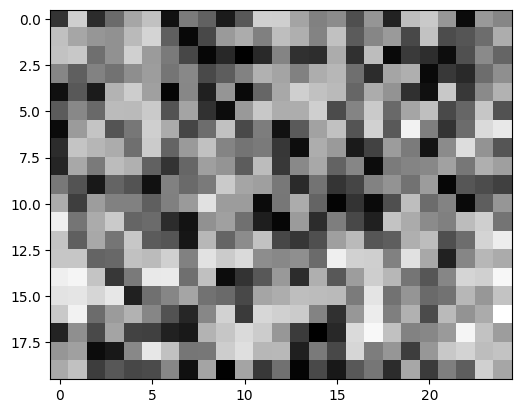

In [25]:
plt.imshow(som._activation_map, cmap="Greys")

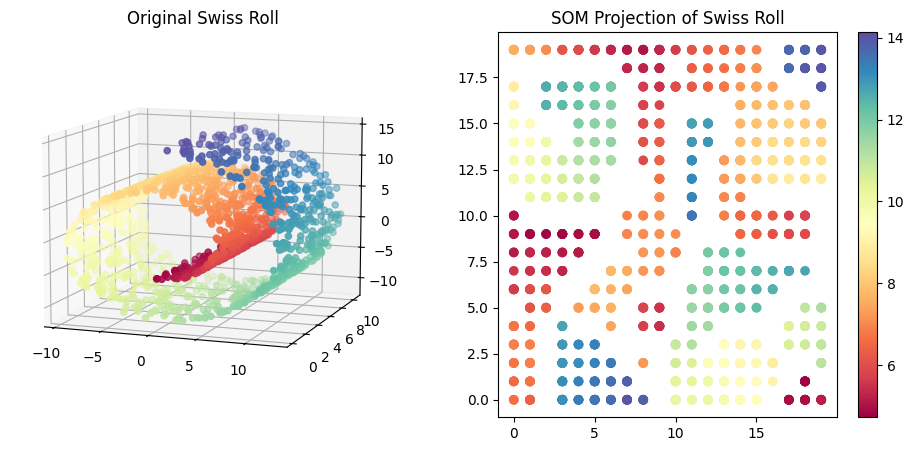

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from minisom import MiniSom

# Generate the Swiss Roll dataset
swiss, color = make_swiss_roll(1600)
swiss[:, 1] = swiss[:, 1] / 2  # Normalize height

# Define the SOM grid (20x20)
som_size = (20, 20)
som = MiniSom(som_size[0], som_size[1], 3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(swiss)
som.train_random(swiss, 10000)  # Train the SOM

# Get the 2D mapping for each point
mapped_points = np.array([som.winner(x) for x in swiss])
x_mapped, y_mapped = mapped_points[:, 0], mapped_points[:, 1]

# Plot results
fig = plt.figure(figsize=(12, 5))

# Original 3D Swiss Roll
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(swiss[:, 0], swiss[:, 1], swiss[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Swiss Roll")
ax1.view_init(10, -70)

# 2D Unrolled SOM Projection
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(x_mapped, y_mapped, c=color, cmap=plt.cm.Spectral)
ax2.set_title("SOM Projection of Swiss Roll")
plt.colorbar(scatter)

plt.show()

# SOM for MNIST digits

In [8]:
#credit: https://github.com/JustGlowing/minisom
#updated by Zhiwu Huang

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='gaussian')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

/Users/zhiwu/Library/CloudStorage/OneDrive-UniversityofSouthampton/3@Southampton/03-Education/01-Teaching/01-Modules/02-DataMining/2-lab/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.940532272445309


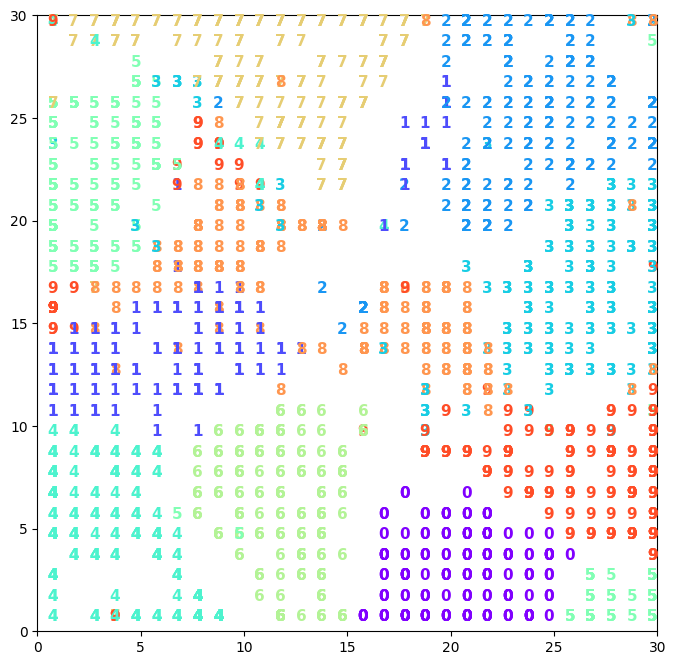

In [9]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('resulting_images/som_digts.png')
plt.show()

# MDS for Swiss roll

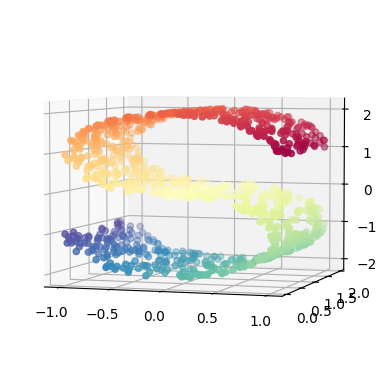

In [28]:
# from sklearn.manifold import MDS
# n_components = 2
# n_points = 1000
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# s_curve, s_color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
# ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=s_color, cmap=plt.cm.Spectral)
# ax.view_init(4, -72)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve

n_points = 1000

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate S-curve dataset
s_curve, s_color = make_s_curve(n_points, random_state=0)

# Plot the S-curve
ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=s_color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

plt.show()

/Users/zhiwu/.pyenv/versions/3.10.10/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


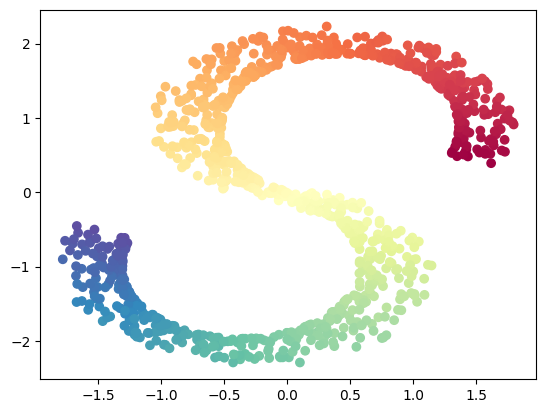

In [29]:
embedding = MDS(n_components, max_iter=1000, n_init=1)
s_MDS = embedding.fit_transform(s_curve)
plt.figure()
plt.scatter(s_MDS[:, 0], s_MDS[:, 1], c=s_color, cmap=plt.cm.Spectral)
plt.show()

/Users/zhiwu/.pyenv/versions/3.10.10/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


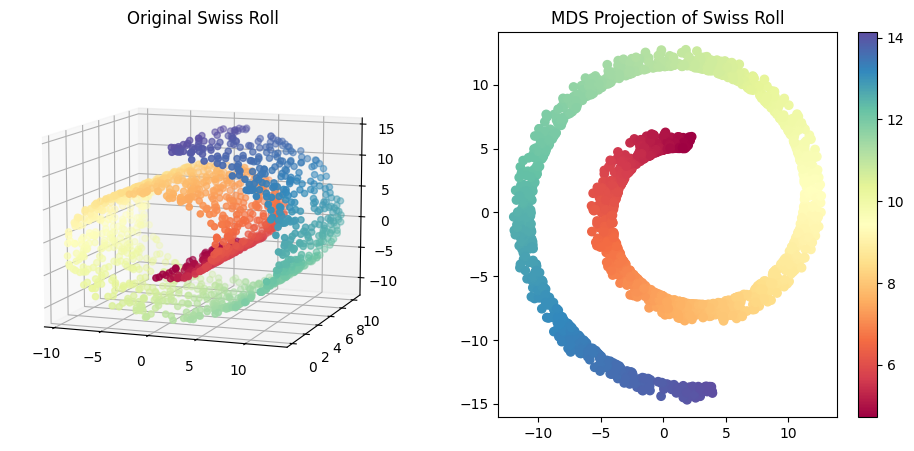

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import MDS

# Generate Swiss Roll dataset
swiss, color = make_swiss_roll(1600)
swiss[:, 1] = swiss[:, 1] / 2  # Normalize height

# Apply MDS to reduce from 3D to 2D
mds = MDS(n_components=2, random_state=0, dissimilarity="euclidean")
swiss_2d_mds = mds.fit_transform(swiss)

# Plot the results
fig = plt.figure(figsize=(12, 5))

# Original 3D Swiss Roll
ax = fig.add_subplot(121, projection='3d')
ax.scatter(swiss[:, 0], swiss[:, 1], swiss[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll")
ax.view_init(10, -70)

# MDS 2D projection
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(swiss_2d_mds[:, 0], swiss_2d_mds[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("MDS Projection of Swiss Roll")
plt.colorbar(scatter)

plt.show()

# SNE

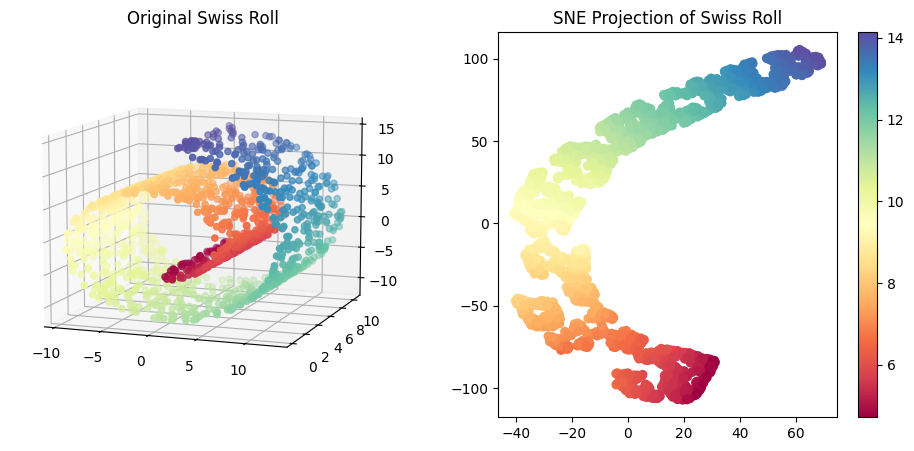

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import TSNE

# Generate Swiss Roll dataset
swiss, color = make_swiss_roll(1600)
swiss[:, 1] = swiss[:, 1] / 2  # Normalize height

# Simulating SNE using t-SNE with modified parameters
sne = TSNE(n_components=2, perplexity=30, learning_rate=200, init="random", n_iter=5000, method="exact", random_state=0)
swiss_2d_sne = sne.fit_transform(swiss)

# Plot results
fig = plt.figure(figsize=(12, 5))

# Original 3D Swiss Roll
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(swiss[:, 0], swiss[:, 1], swiss[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Swiss Roll")
ax1.view_init(10, -70)

# SNE Projection (simulated using t-SNE)
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(swiss_2d_sne[:, 0], swiss_2d_sne[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("SNE Projection of Swiss Roll")
plt.colorbar(scatter)

plt.show()

# t-SNE

Standard deviation: [6.68675096 3.01967857 6.90222101]


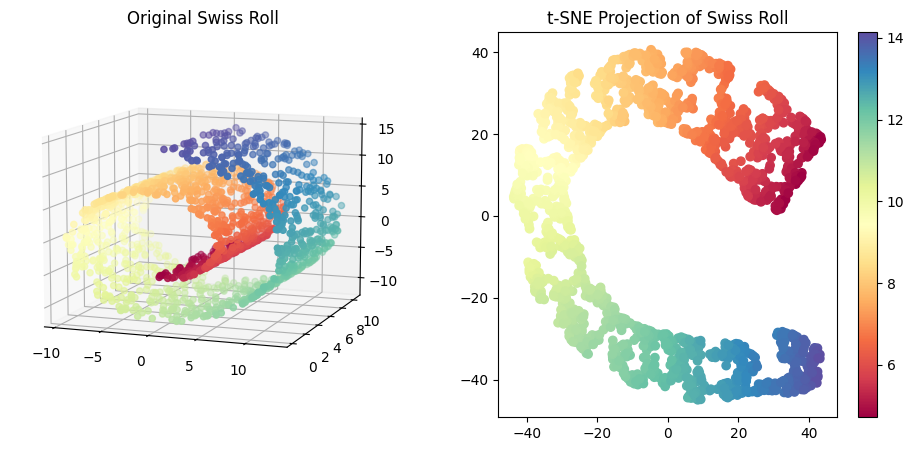

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import TSNE

# Generate the Swiss Roll dataset
swiss, color = make_swiss_roll(1600)
swiss[:, 1] = swiss[:, 1] / 2  # Normalize height

# Print standard deviation of each axis
print("Standard deviation:", np.std(swiss, axis=0))

# 3D Visualization of Swiss Roll
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(swiss[:, 0], swiss[:, 1], swiss[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll")
ax.view_init(10, -70)  # Adjust for better viewing

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=0)
swiss_2d = tsne.fit_transform(swiss)

# 2D Visualization after t-SNE
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(swiss_2d[:, 0], swiss_2d[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("t-SNE Projection of Swiss Roll")
plt.colorbar(scatter)

plt.show()

Below is an example from sklearn: https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

circles, perplexity=5 in 0.11 sec
circles, perplexity=30 in 0.16 sec
circles, perplexity=50 in 0.16 sec
circles, perplexity=100 in 0.16 sec
S-curve, perplexity=5 in 0.11 sec
S-curve, perplexity=30 in 0.17 sec
S-curve, perplexity=50 in 0.16 sec
S-curve, perplexity=100 in 0.16 sec
uniform grid, perplexity=5 in 0.15 sec
uniform grid, perplexity=30 in 0.2 sec
uniform grid, perplexity=50 in 0.19 sec
uniform grid, perplexity=100 in 0.23 sec


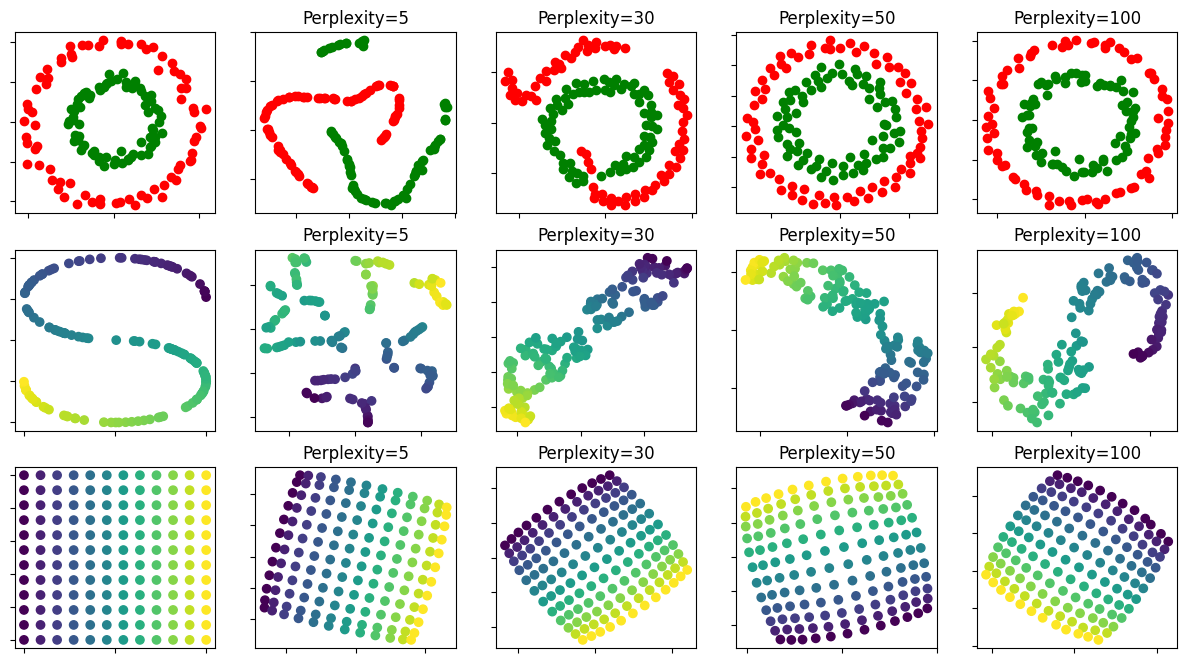

In [32]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()